# 基于Pandas的用电量统计分析 

 安装读取Excel文件的Python软件包xlrd

In [ ]:
!python -m pip install xlrd

## 1 用电量DataFrame


读用电量Execl文件生成DataFrame

![excel_powermeter](./img/excel-powermeter.jpg)


In [1]:
import pandas as pd
excelfile = './data/219_threePhaseIntelligentMeter.xls'
data =  pd.read_excel(excelfile,sheet_name='data',usecols=[1,2],parse_dates=["time"])
data

,time,value
0,2015-02-24 00:10:00,16340.75
1,2015-02-24 00:20:00,16340.77
2,2015-02-24 00:30:00,16340.80
3,2015-02-24 00:40:00,16340.83
4,2015-02-24 00:50:00,16340.86
...,...,...
1113,2015-03-03 17:40:00,16546.44
1114,2015-03-03 17:50:00,16546.56
1115,2015-03-03 18:00:00,16546.76
1116,2015-03-03 18:10:00,16546.95


**原始数据图**

<AxesSubplot:xlabel='time'>

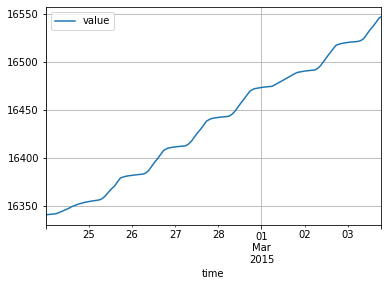

In [2]:
data.plot(x="time",y="value",grid = True)

## 2  数据采样统计

### 总样本数

In [ ]:
data.count()

### 采样天数

In [ ]:
data["time"].max() - data["time"].min()

## 3 能耗统计

### 1 加"month" "day" "hour"列

In [3]:
data["month"]=data["time"].dt.month
data["day"]=data["time"].dt.day
data["hour"]=data["time"].dt.hour
data

,time,value,month,day,hour
0,2015-02-24 00:10:00,16340.75,2,24,0
1,2015-02-24 00:20:00,16340.77,2,24,0
2,2015-02-24 00:30:00,16340.80,2,24,0
3,2015-02-24 00:40:00,16340.83,2,24,0
4,2015-02-24 00:50:00,16340.86,2,24,0
...,...,...,...,...,...
1113,2015-03-03 17:40:00,16546.44,3,3,17
1114,2015-03-03 17:50:00,16546.56,3,3,17
1115,2015-03-03 18:00:00,16546.76,3,3,18
1116,2015-03-03 18:10:00,16546.95,3,3,18


### 1 每日能耗


#### 1 每日能耗计算

In [4]:
max_each_day=data.groupby(["month","day"]).max()
min_each_day=data.groupby(["month","day"]).min()
each_day_power=max_each_day-min_each_day
each_day_power

time  value  hour
month day                             
2     24  0 days 23:40:00  13.62    23
      25  0 days 23:50:00  27.36    23
      26  0 days 23:50:00  29.62    23
      27  0 days 23:50:00  30.72    23
      28  0 days 23:50:00  31.37    23
3     1   0 days 23:50:00  17.04    23
      2   0 days 23:50:00  29.77    23
      3   0 days 18:20:00  26.51    18

#### 2 每日能耗图

* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html

<AxesSubplot:xlabel='month,day'>

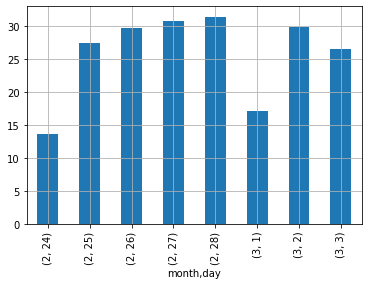

In [28]:
each_day_power.plot.bar(y="value",grid = True,legend=False)

### 2 每小时能耗



#### 1 每小时能耗计算

In [6]:
max_each_hour=data.groupby(["month","day", "hour"]).max()
min_each_hour=data.groupby(["month","day", "hour"]).min()
each_hour_power=max_each_hour-min_each_hour
each_hour_power

time  value
month day hour                       
2     24  0    0 days 00:40:00   0.11
          1    0 days 00:50:00   0.13
          2    0 days 00:50:00   0.13
          3    0 days 00:50:00   0.17
          4    0 days 00:50:00   0.15
...                        ...    ...
3     3   14   0 days 00:50:00   2.18
          15   0 days 00:50:00   2.21
          16   0 days 00:50:00   2.12
          17   0 days 00:50:00   1.56
          18   0 days 00:20:00   0.38

[187 rows x 2 columns]

#### 2 每小时能耗图

##### 2.1 所有天每小时能耗图

<AxesSubplot:xlabel='month,day,hour'>

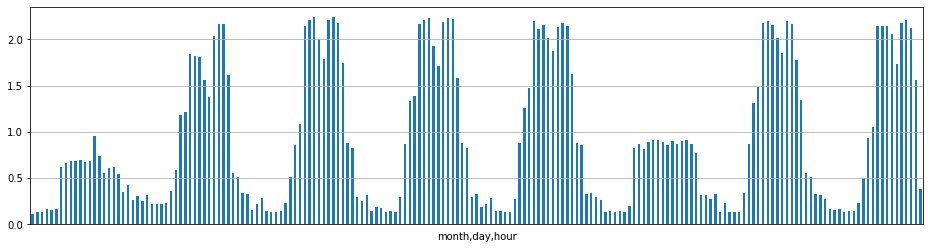

In [44]:
each_hour_power.plot.bar(figsize=(16,4),y="value",grid = True,legend=False,xticks=[])

##### 2.2 某月某天每小时能耗图

2月26日的每小时能耗图

<AxesSubplot:xlabel='hour'>

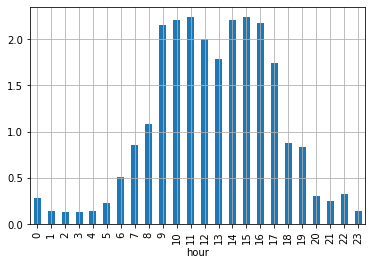

In [27]:
cur_month=2
cur_day=26
each_hour_power.loc[cur_month,cur_day,:].plot.bar(y="value",grid = True,legend=False)


In [54]:
cur_month=3
cur_day=1
day0301=each_hour_power.loc[cur_month,cur_day,:]
day0301

,time,value
hour,,
0,0 days 00:50:00,0.13
1,0 days 00:50:00,0.14
2,0 days 00:50:00,0.13
3,0 days 00:50:00,0.14
4,0 days 00:50:00,0.13
5,0 days 00:50:00,0.20
6,0 days 00:50:00,0.83
7,0 days 00:50:00,0.87
8,0 days 00:50:00,0.81


##### 2.3 某两天每小时能耗对比图

<AxesSubplot:>

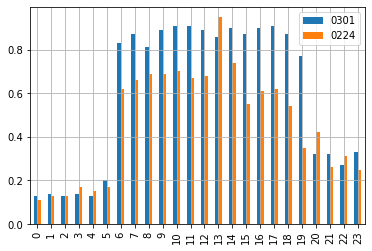

In [61]:
cur_month=3
cur_day=1
day0301=each_hour_power.loc[cur_month,cur_day,:]["value"]
cur_month=2
cur_day=24
day0224=each_hour_power.loc[cur_month,cur_day,:]["value"]
index=[h for h in range(24)]
df = pd.DataFrame({'0301': day0301,'0224': day0224}, index=index)
df.plot.bar(grid = True)

###  3 时间段能耗

#### 1 时间段能耗计算

如上午：8：00 - 12：59

In [14]:
data812=data[(data["hour"]>=8) & (data["hour"]<=12)]
max_hour812=data812.groupby(["month","day"]).max()
min_hour812=data812.groupby(["month","day"]).min()
hour812_power=max_hour812-min_hour812
hour812_power

time  value  hour
month day                             
2     24  0 days 04:50:00   3.97     4
      25  0 days 04:50:00   9.68     4
      26  0 days 04:50:00  11.24     4
      27  0 days 04:50:00  11.54     4
      28  0 days 04:50:00  11.76     4
3     1   0 days 04:50:00   5.06     4
      2   0 days 04:50:00  11.75     4
      3   0 days 04:50:00  11.25     4

#### 2 时间段能耗图

<AxesSubplot:xlabel='month,day'>

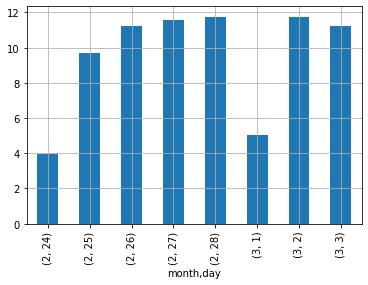

In [29]:
hour812_power.plot.bar(y="value",grid = True,legend=False)